![](ptype.webp)

# How do personality types compare across different, but culturally similar, countries?

The Big Five personality quiz is a significant and scientifically accepted test that assesses personality traits on five main scales: openness, conscientiousness, extraversion, agreeableness, and neuroticism. The scales are shortened to the acronym OCEAN. Since the personality test is widely used, I was curious to see how different personality types would compare across different countries. Specifically, I was interested in seeing if ethnicity or culture is related to personality type.

To create an interesting analysis, I decided to look at two different regions, the Caribbean and South Asia. Specifically, the countries of Guyana, Trinidad, Jamaica, India, Pakistan, and Bangladesh. These regions are interesting because the Caribbean countries have a significant South Asian diaspora population.

To conduct this analysis, I looked at historical data of Big Five personality scores.

### How do personality types compare across the Caribbean?

I first looked at how the data compared across Guyana, Jamaica, and Trinidad, by importing the data and coding the following graph.

In [13]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [14]:
big5_df = pd.read_csv('data/openpsych_data.csv', sep='\t')

In [15]:
factor_map = { 1: 'E', 
               2: 'A',
               3: 'C',
               4: 'N',
               5: 'O' }

In [16]:
ipip_df = pd.read_html('big5_questions.html', header=0)[0]
ipip_df = ipip_df.rename(columns={'Unnamed: 1': 'text', 'Unnamed: 7': 'factor_and_direction'})[['text','factor_and_direction']]
ipip_df[['factor','direction']]=ipip_df['factor_and_direction'].str.extract(r'([1-5])(.)')
ipip_df['category']=ipip_df['factor'].astype(int).map(factor_map)

In [17]:
ipip_df = ipip_df.assign(number=np.repeat(np.arange(1,11),5))
ipip_df = ipip_df.assign(qcode=ipip_df['category'].str.cat(ipip_df['number'].astype(str)))   

In [18]:
neg_items = ipip_df.query('direction=="-"')['qcode']

In [19]:
big5_scored_df = big5_df.copy()

In [20]:
big5_scored_df[neg_items] = 6-big5_df[neg_items]

In [21]:
cat_cols = {
    cat : [f'{cat}{n+1}' for n in range(10)] 
    for cat in ('O','C','E','A','N') 
}

In [22]:
for cat, cols in cat_cols.items():
    big5_scored_df[cat]=big5_scored_df[cols].sum(axis=1)

<Axes: >

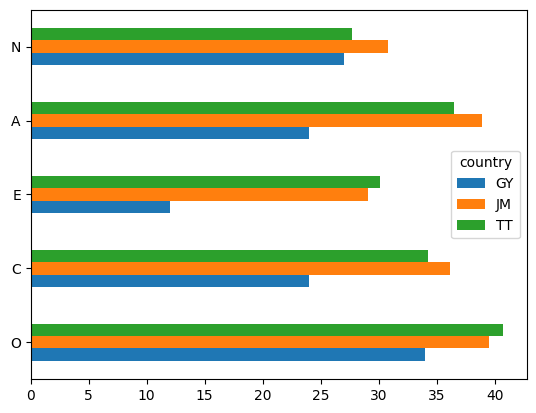

In [23]:
(
    big5_scored_df.query('country in ["TT","GY","JM"]').
        groupby('country')[['O','C','E','A','N']].
        agg('mean').
        round(1).
        transpose().
        plot(kind='barh')
)

The graph above shows that the Caribbean countries have a diverse set of scores on the Big 5 personality test. The countries score similarly for neuroticism, with Guyana and Trinidad almost scoring identically. Jamaica and Trinidad tend to have similar scores across all 5 factors, with Guyana as an outlier. The diverse personality types of this region can be explained by the region's very diverse cultures and ethnicities. For example, the history and culture of Afro-, Indo-, and Indigenous Caribbeans can explain the varied personality scores. However, it is interesting to note the similarities between Jamaica and Trinidad. 

### How do personality types compare across the South Asian?

I then created an identical graph, comparing the personality scores of Bangladesh, India, and Pakistan.

<Axes: >

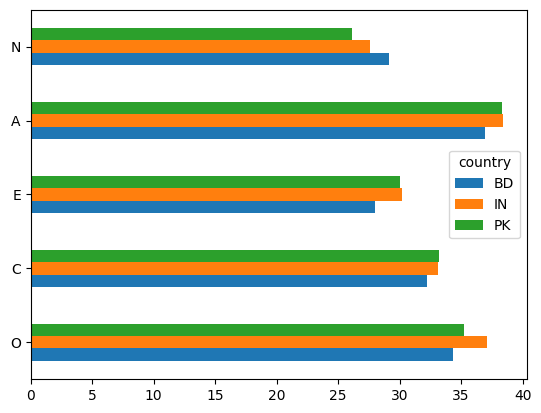

In [29]:
(
    big5_scored_df.query('country in ["IN","PK","BD"]').
        groupby('country')[['O','C','E','A','N']].
        agg('mean').
        round(1).
        transpose().
        plot(kind='barh')
)

This graph shows that the South Asian subcontinent scored almost identically on all five aspects of the Big 5 personality score. This comparison is very interesting and can also be explained by the history and cultures of these three countries. Especially since the countries are close in proximity and were all once part of the greater Indian colony of Great Britain.

### Comparison of Both Regions

<Axes: >

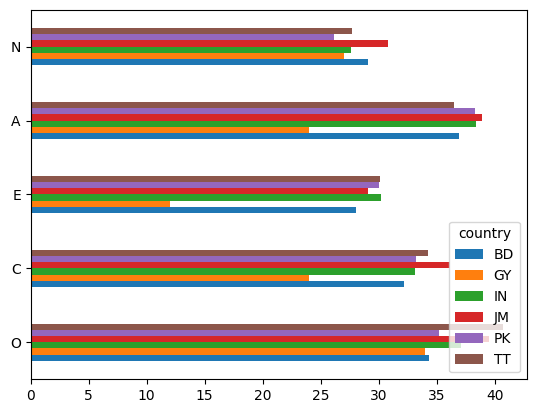

In [30]:
(
    big5_scored_df.query('country in ["TT","GY","JM","IN","PK","BD"]').
        groupby('country')[['O','C','E','A','N']].
        agg('mean').
        round(1).
        transpose().
        plot(kind='barh')
)

In this merge graph, further comparisons can be drawn. Again, the six countries have diverse scores for the different factors. Guyana is again an outlier since it has the most differing score compared to the other 5 countries, specifically extraversion and conscientiousness.

The comparison of these two regions does not necessarily prove that the country has a direct relationship with personality type. However, in the case of South Asia, the strong similarities between the three countries can imply a relationship, perhaps rooted in the shared history of the region. While the difference in the Caribbean countries can be a result of the racial and historical diversity of the region.

Overall, these graphs provide an interesting analysis on the role of cultural simialrities in the personality type of populations!